<a href="https://colab.research.google.com/github/Ilyass-Dahaoui/CodSoft_Tasks/blob/main/TASK4_SALES_PREDICTION_USING_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
data=pd.read_csv("/content/car_purchasing.csv" , encoding='ISO-8859-1')
data.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


In [6]:
data.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [9]:
data.columns

Index(['customer name', 'customer e-mail', 'country', 'gender', 'age',
       'annual Salary', 'credit card debt', 'net worth',
       'car purchase amount'],
      dtype='object')

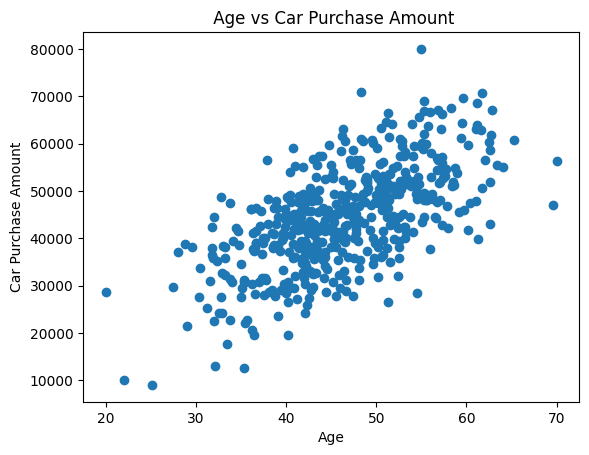

In [12]:
import matplotlib.pyplot as plt

plt.scatter(data['age'], data['car purchase amount'])
plt.xlabel('Age')
plt.ylabel('Car Purchase Amount')
plt.title(' Age vs Car Purchase Amount')
plt.show()

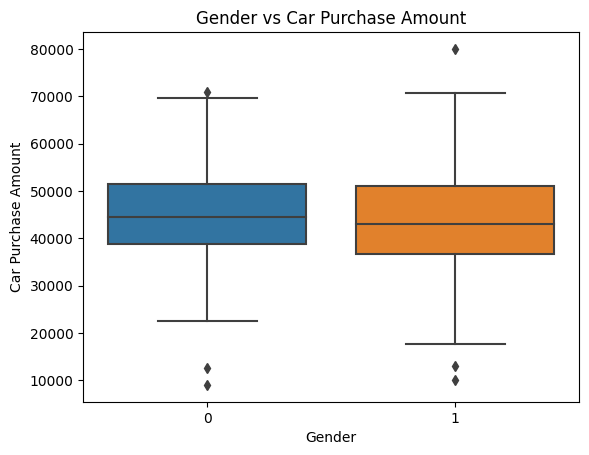

In [13]:
import seaborn as sns

sns.boxplot(x='gender', y='car purchase amount', data=data)
plt.xlabel('Gender')
plt.ylabel('Car Purchase Amount')
plt.title('Gender vs Car Purchase Amount')
plt.show()


In [18]:
#DATA CORRELATIONS
numerical_variables = ['age', 'annual Salary', 'credit card debt', 'net worth', 'car purchase amount']
numerical_data = data[numerical_variables]
correlation_matrix = numerical_data.corr()
print(correlation_matrix)


                          age  annual Salary  credit card debt  net worth  \
age                  1.000000       0.000130          0.034721   0.020356   
annual Salary        0.000130       1.000000          0.049599   0.014767   
credit card debt     0.034721       0.049599          1.000000  -0.049378   
net worth            0.020356       0.014767         -0.049378   1.000000   
car purchase amount  0.632865       0.617862          0.028882   0.488580   

                     car purchase amount  
age                             0.632865  
annual Salary                   0.617862  
credit card debt                0.028882  
net worth                       0.488580  
car purchase amount             1.000000  


In [24]:
x = data[['age', 'annual Salary', 'credit card debt', 'net worth']]
y = data['car purchase amount']

In [25]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
x_train.size

1600

In [27]:
x_test.size

400

In [38]:
model = LinearRegression()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'LinearRegressionModel_Mean Squared Error : {mse:.2f}')
print(f'LinearRegrModel_R-squared (R2) Score: {r2:.2f}')

LinearRegressionModel_Mean Squared Error : 2.07
LinearRegrModel_R-squared (R2) Score: 1.00


In [37]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'RandomForestModel_Mean Squared Error: {mse:.2f}')
print(f'RandomForestModel_R-squared (R2) Score: {r2:.2f}')

RandomForestModel_Mean Squared Error: 5084807.03
RandomForestModel_R-squared (R2) Score: 0.95


In [43]:
model = DecisionTreeRegressor(random_state=42)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'DecisionTreeModel_Mean Squared Error: {mse:.2f}')
print(f'DecisionTreeModel_R-squared (R2) Score: {r2:.2f}')

DecisionTreeModel_Mean Squared Error: 12533109.35
DecisionTreeModel_R-squared (R2) Score: 0.88
